## Table of Content

### 1. Introduction
- 1.1 Data Description
- 1.2 Objective of this project

### 2. Fetching Data
- 2.1 Import necessary Libraries
- 2.2 Import data

### 3. EDA
- 3.1 Checking null values
- 3.2 Filling Null Values
- 3.3 Univariate Analysis
- 3.4 Bivariate Analysis
- 3.5 Multivariate Analysis

### 4. Encoding Dataframe
### 5. Describe the dataset
### 6. Correlation of the features with target column
### 7. Visualizing correlation of feature columns with label column.
### 8. Checking Distribution of data
### 9. Checking Outliers
- 9.1 Removing Outliers
- 9.2 Parcentage of data loss

### 10. Checking Multicollinearity
- 10.1 Droping columns whose have multicollinearity

### 11. Selecting KBest Feature
- 11.1 Selecting best features based on their scores
- 11.2 Data Before removing skewness
- 11.3 Data After Removing Skewness

### 12. Building Model
- 12.1 Balancing Datasaet
- 12.2 LogisticRegression
- 12.3 Random Forest Classifier
- 12.4 Gradient Boosting Classifier
- 12.5 SVC
- 12.6 KNN
- 12.7 XGBOOST

### 13. Selecting Best Model
### 14. Hyperparameter Tuning
### 15. ROC_AUC Curve
### 16. Documenting the finding
### 17. Model Save
- 17.1 Loading the model
- 17.2 Predicting the class

## 1. Introduction
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.


### 1.1 Data Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.


### 1.2 Objective of this project
- The goal of this machine learning project is to predict the fraud_reported.
- This is the classification problem

## 2. Fetching Data

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### 2.2 Importing dataset

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.shape

(1000, 40)

### Droping Duplicates

In [6]:
data.drop_duplicates()
data.shape

(1000, 40)

- No duplicates values are present.

### Checking unique values

In [7]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# 3. EDA

### 3.1 Checking Null Values

In [8]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

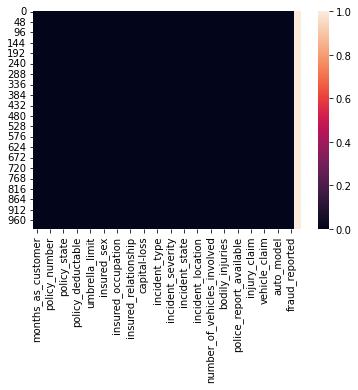

In [9]:
sns.heatmap(data.isnull())

- We can see, only the one feature has all records null values so I simply drop that feature.
- Rest of all features has no null vqalues.

In [10]:
data.drop(columns=['_c39'],axis=1, inplace=True)

In [11]:
object_columns=data.select_dtypes(include=["object"]).columns 
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data[object_columns[i]].value_counts()) 

----- policy_bind_date-----
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
28-01-2010    2
29-09-1999    2
25-09-2001    2
04-05-2000    2
03-02-1997    2
07-04-1999    2
25-12-2013    2
28-12-1991    2
30-08-1993    2
21-09-2005    2
20-07-1991    2
29-01-1998    2
24-06-1990    2
22-08-1991    2
09-07-2002    2
07-12-1999    2
07-07-1996    2
16-07-2002    2
11-11-1998    2
28-12-2002    2
03-01-2004    2
05-07-2014    2
15-05-1997    2
14-04-1992    2
09-03-2003    2
07-11-1997    2
05-01-1992    2
15-11-1997    2
14-07-1997    2
06-05-2007    2
21-09-1996    2
16-05-2008    2
21-12-2002    2
11-03-2010    2
19-09-1995    2
08-11-2009    2
07-12-1995    2
25-05-1990    2
20-09-1990    2
04-06-2000    2
27-07-2014    2
07-04-1994    1
29-02-1992    1
09-08-2002    1
16-09-1990    1
02-12-2012    1
22-03-2000    1
09-10-1995    1
11-12-1998    1
13-04-2002    1
17-06-2008    1
28-07-2002    1
21-12-1999    1
27-05-2002    1
28-03-1990    1
05-12-2014  

- In collision type, property_damage and police_report_available in this columns '?' is present.
- So replace this '?' with null value.

### 3.2 Filling null values

In [12]:
data=data.replace(" ?",np.nan) 

In [13]:
data["collision_type"]=data["collision_type"].replace('?',np.nan)

data["property_damage"]=data["property_damage"].replace('?',np.nan)

data["police_report_available"]=data["police_report_available"].replace('?',np.nan)


In [14]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [15]:
null_columns =['collision_type','property_damage','police_report_available']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True)

In [16]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Checking all information

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Datatype is ok with respect to their column.
- Output columns is object datatypes it mean its classification problem.

## 3.3 Univariate Analysis

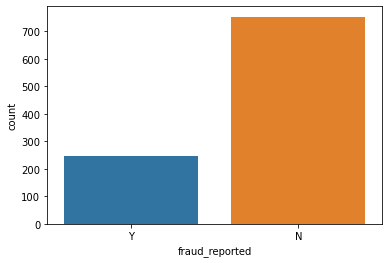

In [18]:
sns.countplot(x='fraud_reported',data=data)
plt.show()

- There are less customers are doing fraud.
- Data is inbalance so we need to balance it while building the model.

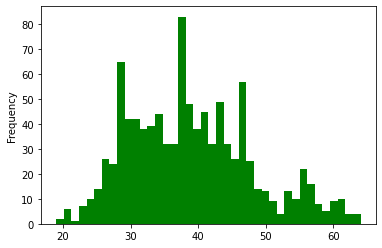

In [19]:
data['age'].plot.hist(bins=40, color='g')
plt.show()

- Most of the insurance holder are in the range of 30 to 45 years age. In this age mostly insurance holder lies.
- After the 45 year insurance holder age is decreasing.

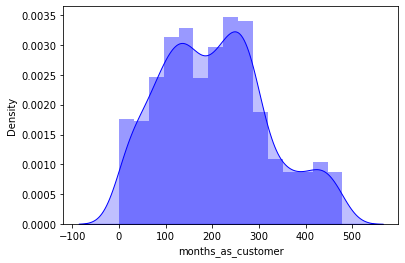

In [20]:
# Distribution plot for the column months_as_customer
sns.distplot(data["months_as_customer"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, months as customer is seem not normaly distributed. But after the 300 the months as customers decline.
- The data is right-skewed.

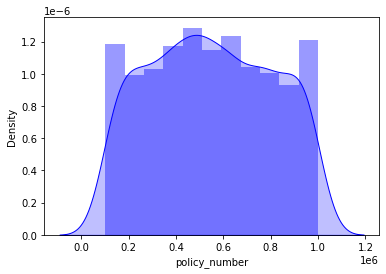

In [21]:
# Distribution plot for the column policy_number
sns.distplot(data["policy_number"],color="b",kde_kws={"shade": True},)
plt.show()

- Policy number seem to be categorical data. But it is little normaly distributed.
- So i will drop this feature because it does not make any sense.

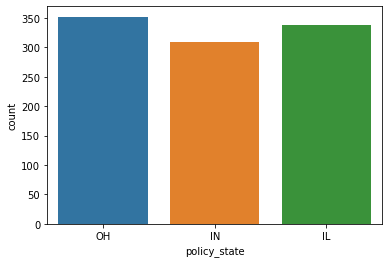

In [22]:
sns.countplot(x='policy_state',data=data)
plt.show()

- OH state has maximum in others followed by IL.
- All policy state has equally distributed upto 300 counts.

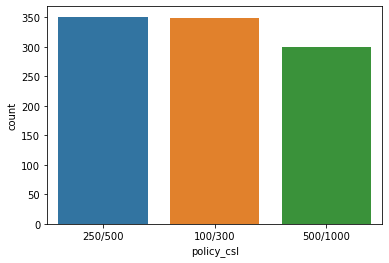

In [23]:
sns.countplot(x='policy_csl',data=data)
plt.show()

- We can see, Policy csl has decreasing state. In which the 250/500 has top.
- And the bottom 500/1000. These policy are in less number than others.

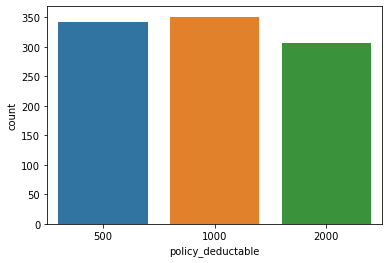

In [24]:
sns.countplot(x='policy_deductable',data=data)
plt.show()

- We can see, maximum policy detectable is 1000. It seem to be llike amount in doller in which maximum amount detectable is 1000 doller.
- But 500 and 1000 are almost in same count. And the lower policy detectable amount is $2000

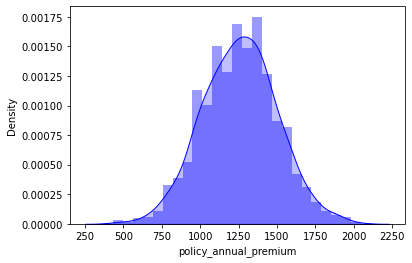

In [25]:
# Distribution plot for the column policy_number
sns.distplot(data["policy_annual_premium"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, policy annual premium is normaly distributed.
- Maximum insurance holder have a premium amount in the range of 1000 to 1500.

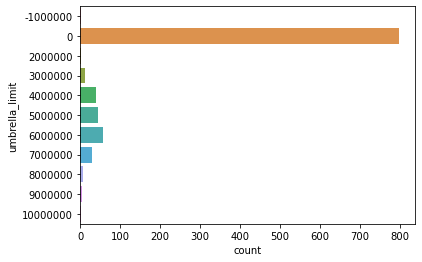

In [26]:
sns.countplot(y='umbrella_limit',data=data)
plt.show()

- from above we can understand that for premium has no limit. and there is no umbrella limit on insurance.
- But MAximum has insurance upto some limit and it show some limitation in insurance.

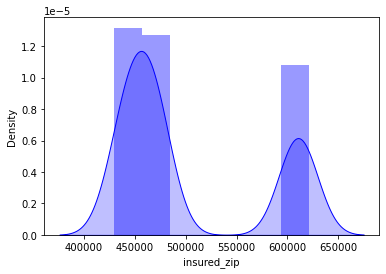

In [27]:
# Distribution plot for the column policy_number
sns.distplot(data["insured_zip"],color="b",kde_kws={"shade": True},)
plt.show()

- The data is seem to be a categorical and it show it divided data in some categories.
- We can see data is not normaly distributed.

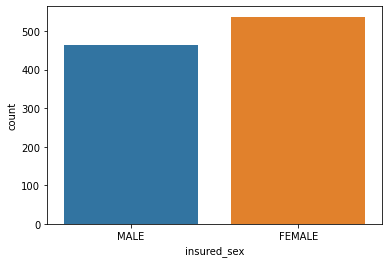

In [28]:
sns.countplot(x='insured_sex',data=data)
plt.show()

- We can see, female has maximum insurance than male.
- Upto 460 count both are equally distributed.

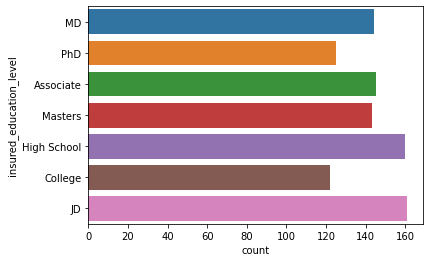

In [29]:
sns.countplot(y='insured_education_level',data=data)
plt.show()

- We can see, junior degree is higher count than other whose holding insurance followed by high school. Education it does not matter for insurance any one cna insuraed. And above it show the college and Phd holder are in less number who are having insurance.


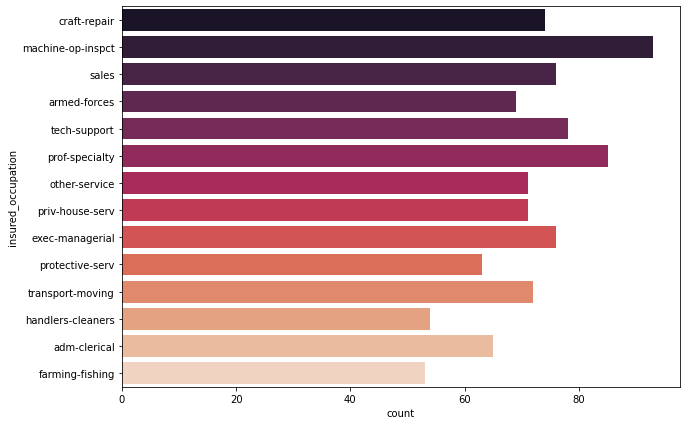

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(y='insured_occupation',data=data, palette='rocket')
plt.show()

- maximum machine oerator inspector are having maximum insurance holding customer than other followed by prof-speciality.
- Those are doing farming- fishing they are in less number and even they are less insurance holder than others followed by cleaners.
- We can see, occupation it that much is not matter for insurance like education.

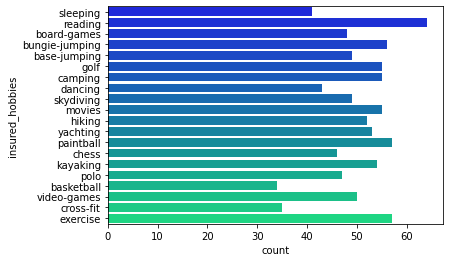

In [31]:
sns.countplot(y='insured_hobbies',data=data, palette='winter')
plt.show()

- We can see, reading has maximum hobbies of customers. Most of the customers having reading as hobbies followed by bungle-jumping.
- polo has less hobbies of customers than others followed by cross-fit.

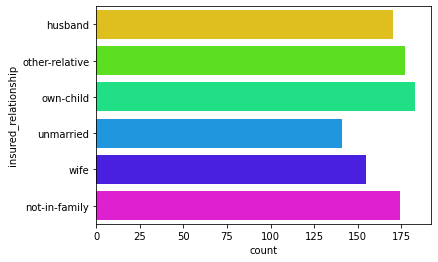

In [32]:
sns.countplot(y='insured_relationship',data=data, palette='hsv')
plt.show()

- We can see, Own-child has in maximum whose having relation with insurance holder followed by other relative.
- Unmarried is less in number whose having relation with insurance holder followed by wife.

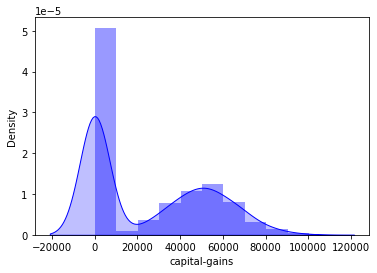

In [33]:
# Distribution plot for the column capital-gains
sns.distplot(data["capital-gains"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, capital gain is not normaly distributed.
- Maximum capital gian is lies in the range of 20000 to 80000.

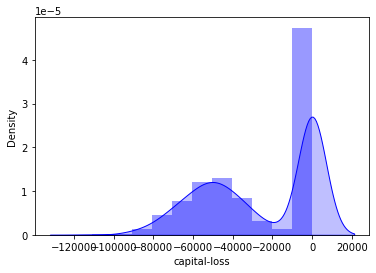

In [34]:
# Distribution plot for the column capital-loss
sns.distplot(data["capital-loss"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, capital is left skewed and it is not normally distributed.

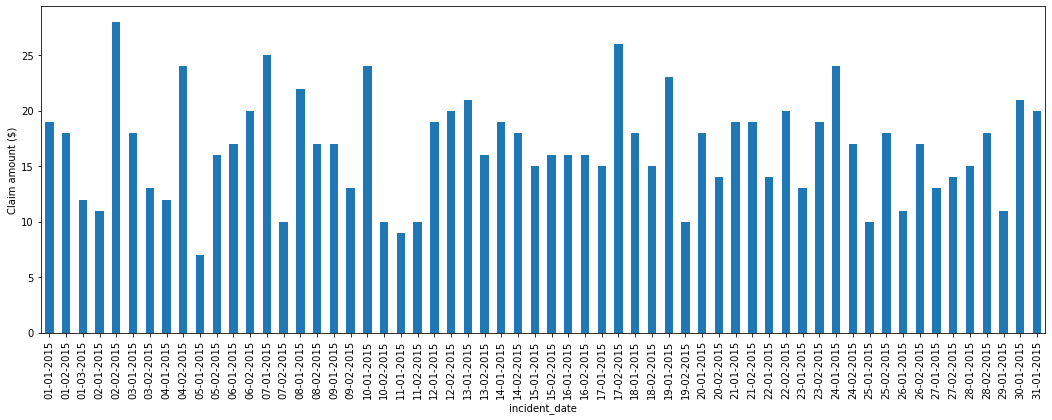

In [35]:
plt.figure(figsize=(18,6))
ax = data.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

- We can see, on date 2/2/2015 has maximum claiming. On this date most of the customer are claiming their amount foolowed by 17/2/2015.
- 5/1/2015 on this date there are less customers are claiming for thier amount than others.

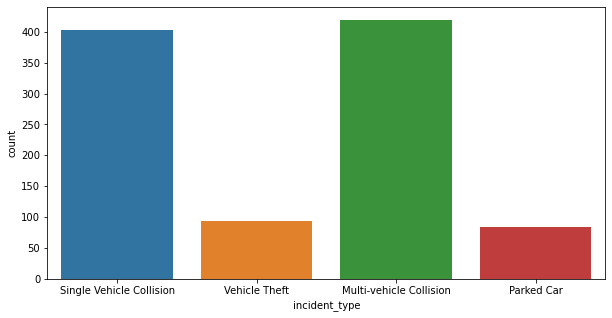

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type',data=data)
plt.show()

- We can see, multi-vehicle collision has maximum count than other whose incident happend. It is need to overcome this because fatality rate may also high due to multi-vehicle collision.
- Parked Car is lowest among other incident type.

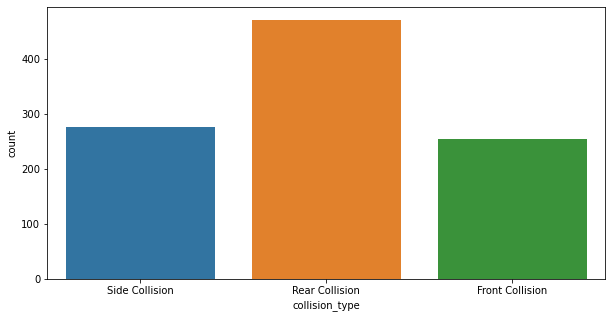

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='collision_type',data=data)
plt.show()

- Mostly real collision type insident is happend than others followed by Side Collision.

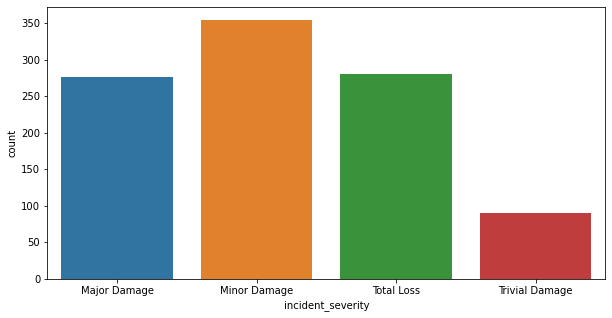

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_severity',data=data)
plt.show()

- From above we can see, Minor damage is maximum than others. Is ok because Of less incident severity the damqage is minor than others.
- But Major Damage and Total loss also in same count and it has more loss.
- Trivial Damage is lower than others damage and it is in low incident severity 

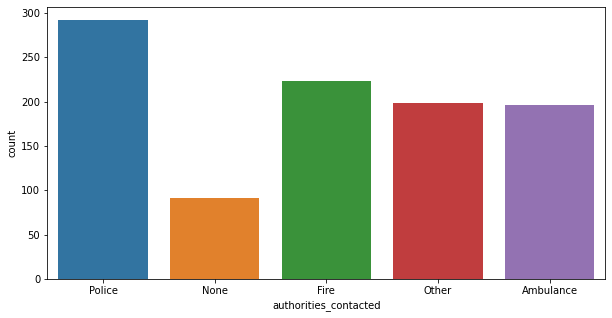

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='authorities_contacted',data=data)
plt.show()

- Police has maximum reported the cases than others. It is main source of authorites to contact followed by Fire.
- Other has lower count in athorities contacted where no one call to other. If the incident is happend mostly call for Ambulance and followed by Police but in the case it is in reversed.

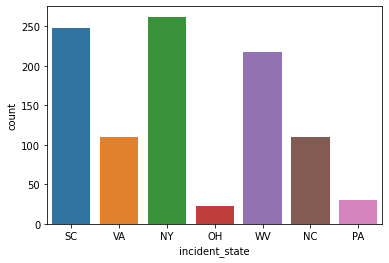

In [40]:
sns.countplot(x='incident_state',data=data)
plt.show()

- Most of the incident happend in NY(New York) state followed by SC.
- Whereas Lowest incident recorded at OH. It may be other state.

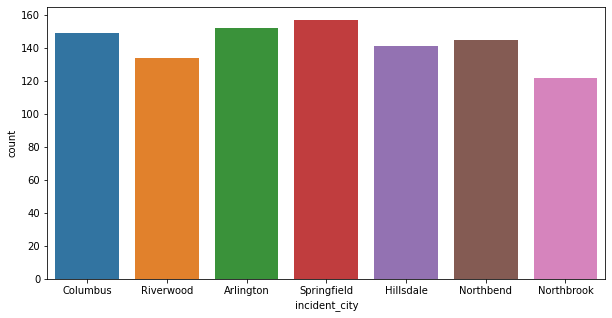

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_city',data=data)
plt.show()

- Springfield in this city maximum cases are reported followed by Arlington city.
- In Northbrook has reported lower incident than other city.
- But most of the cities are reported upto 130 incident.

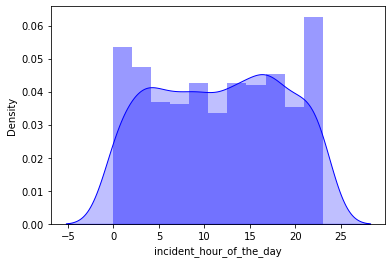

In [42]:
# Distribution plot for the column incident_hour_of_the_day
sns.distplot(data["incident_hour_of_the_day"],color="b",kde_kws={"shade": True},)
plt.show()

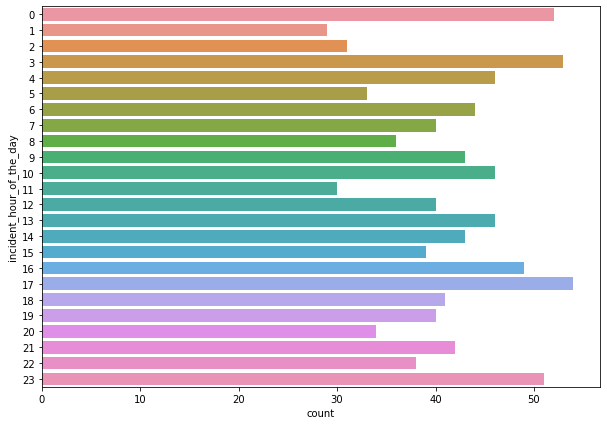

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(y='incident_hour_of_the_day',data=data)
plt.show()

- We can see, at 17 hour in incident hour of the day has maximum cases are reported folloed by 3. But can observed here is 17 hours it simply 17oclock at this a office leaving time. So we can say that most of the incident are happend durring office leaving hours.
- In 20 hour less incident are reported.

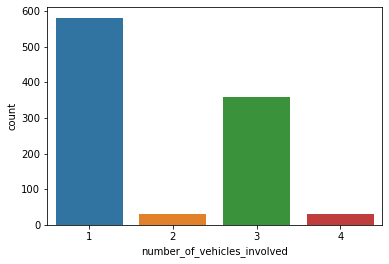

In [44]:
sns.countplot(x='number_of_vehicles_involved',data=data)
plt.show()

- We can see, only 1 vehicle are involvment is maximum than others followed by 3 vehicle.
- 2 and 3 vehicle involment is lower than others during incident.

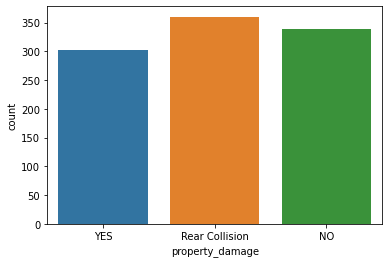

In [45]:
sns.countplot(x='property_damage',data=data)
plt.show()

- Rear Collision has maximum property damage followed by No.
- Rear collision and No property damage are close to each others.

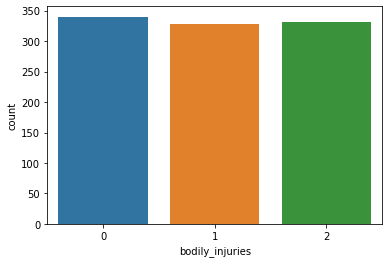

In [46]:
sns.countplot(x='bodily_injuries',data=data)
plt.show()

- O has maximum bodily injuries followed by 1 bodily injuries.
- All are having almost same quantity.

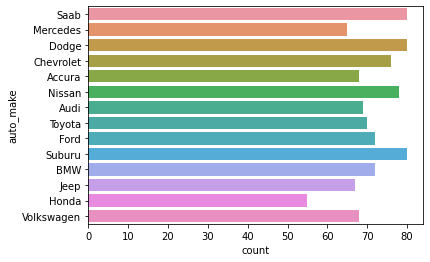

In [47]:
sns.countplot(y='auto_make',data=data)
plt.show()

- Suburu has maximum count auto maker company whose has maximum insurance claim than other followed by Dodge.
- Honda has lower number than others.

## 3.4 Bivariate Analysis

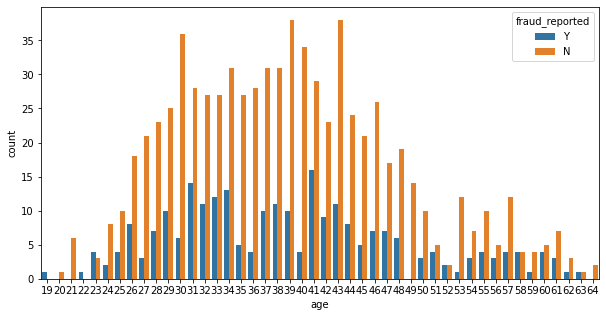

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='age',hue='fraud_reported',data=data)
plt.show()

- We can see, insurance holder having age lies 29 to 47 maximum. In this age maximum fraud insurance claim reported than others.
- But iat age 39 and 45 has highest fraud detection.

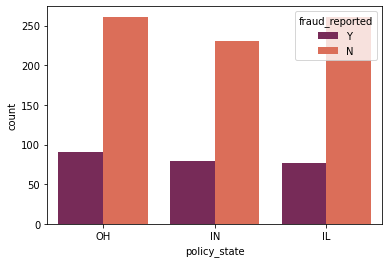

In [49]:
sns.countplot(x='policy_state',hue='fraud_reported',data=data,palette='rocket')
plt.show()

- We can see, OH stae has reported maximum fraud claim followed by IN.
- Almost all state reported same fraud cases.

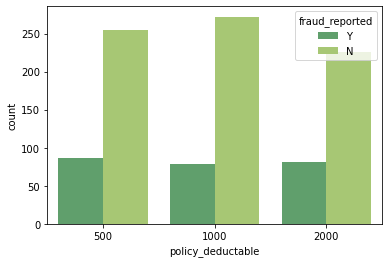

In [50]:
sns.countplot(x='policy_deductable',hue='fraud_reported',data=data,palette='summer')
plt.show()

- Same policy deductale as comapring to fraud reprted cases. All policy are having same proportion of fraud detection But 500 has lower than NO fraud detection comparing to others.

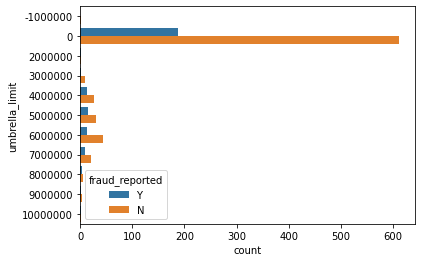

In [51]:
sns.countplot(y='umbrella_limit',hue='fraud_reported',data=data)
plt.show()

- There is no maximum limit, here is have maximum fraud repored.
- Remaining all have some limit and where low fraud case reported.

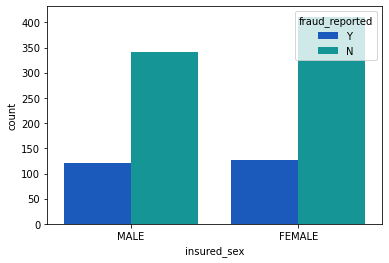

In [52]:
sns.countplot(x='insured_sex', hue='fraud_reported',data=data, palette='winter')
plt.show()

- Almost both male and female have similar range of fraud reported.
- But Male has low fraud not reported than female.

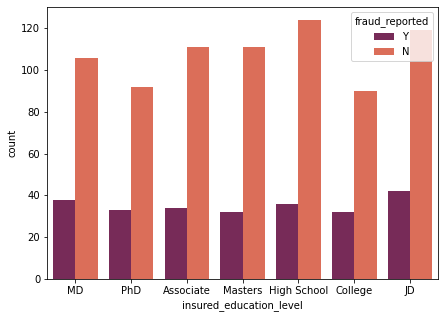

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(x='insured_education_level', hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Junior degree has maximum insurance fraud reported than other education level followed by Master degree.
- Phd has lowest insurance fraud reported followed by Master.

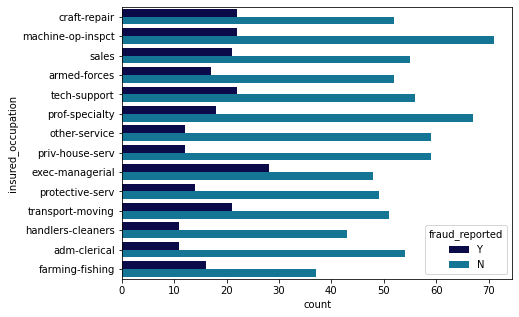

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(y='insured_occupation', hue='fraud_reported',data=data, palette='ocean')
plt.show()

- Executive manager has reported maximum fraud insurance claim than others followed by transport.
- It means those are doing managerial occupation has maximum fraud insurance claim followed by transport.
- Those are doing clerical occupation has lowest fraud detection than others followed by cleaners.

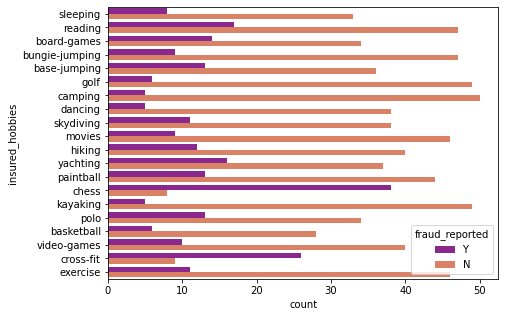

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(y='insured_hobbies', hue='fraud_reported',data=data, palette='plasma')
plt.show()

- Whose have playing chess they are having maximum fraud record. It means they have reported highest fraud insurance claim than others followed by cross fit.
- Camping has lowest fraud insurance claim reported than others followed by dancing.

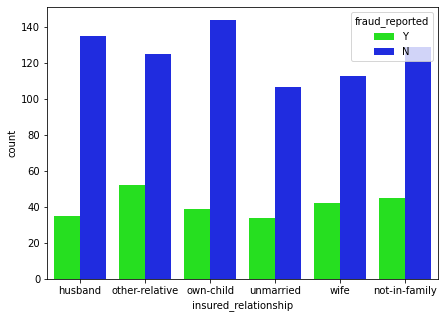

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(x='insured_relationship', hue='fraud_reported',data=data, palette='hsv')
plt.show()

- Other relative has reported maximum fraud insurance claim than others followed by not -in family.
- Whereas unmarried  has reported lowest fraud claim followed by husband.

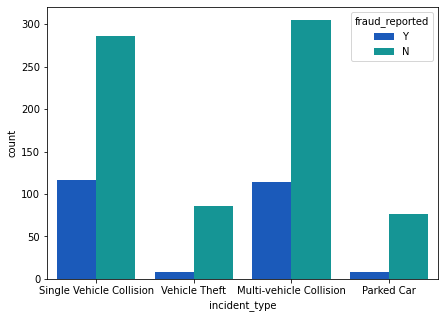

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(x='incident_type', hue='fraud_reported',data=data, palette='winter')
plt.show()

- Multi-vehicle collision has maximum fraud claim reported than others followed by single vehicle collision.
- Vehicle theft has lowest fraid claim reported.

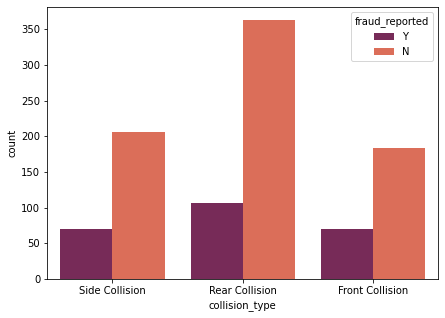

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(x='collision_type', hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Rear colliand has maximum fraud insurance claim than others.
- Front collision has lowest fraud insurance claim than others so we need to focus on safe driving of vehicle so that we will avoid the incident and collision.

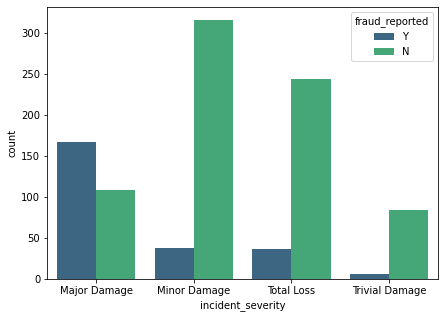

In [59]:
plt.figure(figsize=(7,5))
sns.countplot(x='incident_severity', hue='fraud_reported',data=data, palette='viridis')
plt.show()

- Major damage has maximum fraud cases reported than others.
- Trival damage has lowest fraud insurance claim than others.

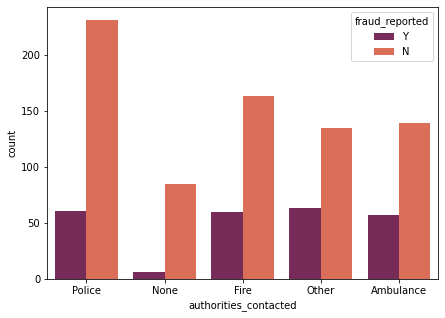

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(x='authorities_contacted', hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Other is a main authories whose reported maximum cases of incident but it also have high fraud insurance claim.
- None or no one can reported cases but is has low insurance claim it may because of on insurance holding.

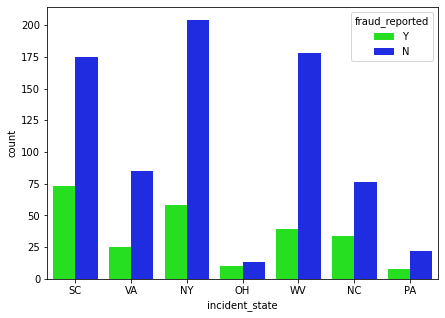

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(x='incident_state', hue='fraud_reported',data=data, palette='hsv')
plt.show()

- SC city has reported maximum insurance fraud claim followed by NY city.
- OH city has reported lowest insurance fraud claim followed by PA city.

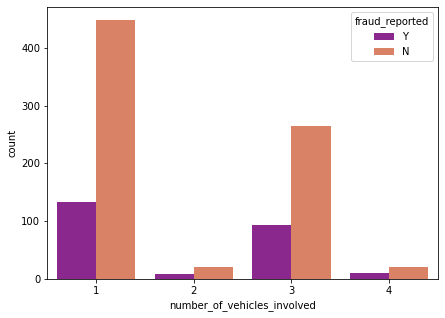

In [62]:
plt.figure(figsize=(7,5))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported',data=data, palette='plasma')
plt.show()

- 1 no of vehicle involved has maximum fraud insurance claim followed by 3.
- 2 no of vehicle invovlement has low fraud insurance claim.

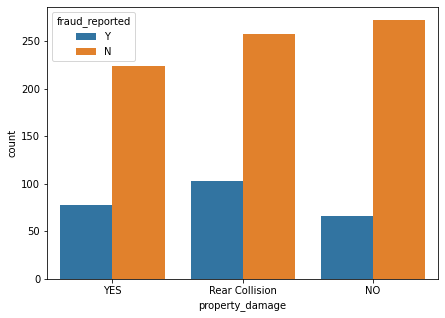

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(x='property_damage', hue='fraud_reported',data=data,)
plt.show()

- Due rear collision property damge is maximum than others and it also have high fraud insurance claim.
- Yes it mean damage by others it also have fraud insurance claim.

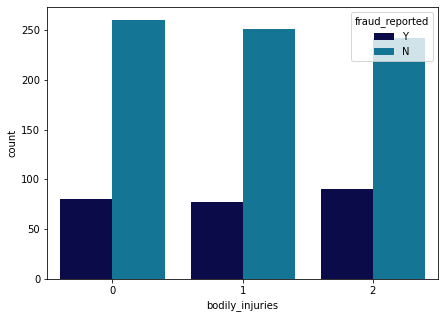

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(x='bodily_injuries', hue='fraud_reported',data=data, palette='ocean')
plt.show()

- 2 bodily injuries has maximum fraud insurance claim detection.
- 0 bodily injuries has lower fraid insurance claim.

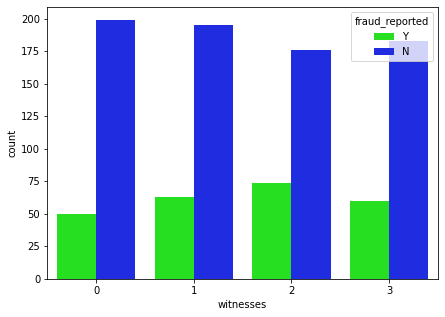

In [65]:
plt.figure(figsize=(7,5))
sns.countplot(x='witnesses', hue='fraud_reported',data=data, palette='hsv')
plt.show()

- 2 witness has reported cases and it also have high fraud insurance claim followed by 3 witness.
- 0 witness has low fraud insurance claim than others.

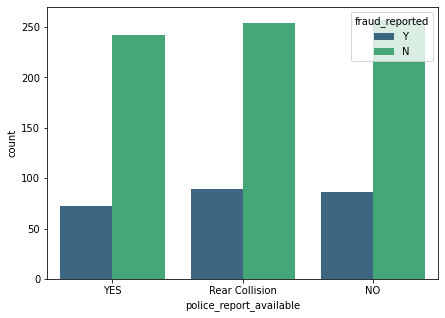

In [66]:
plt.figure(figsize=(7,5))
sns.countplot(x='police_report_available', hue='fraud_reported',data=data, palette='viridis')
plt.show()

- due rear collision the police cases are more reported than others and it also has high fraud insurance claim.
- No Police report they also have high insurance fraud claim than others.

## 3.5 Multivariate Analysis

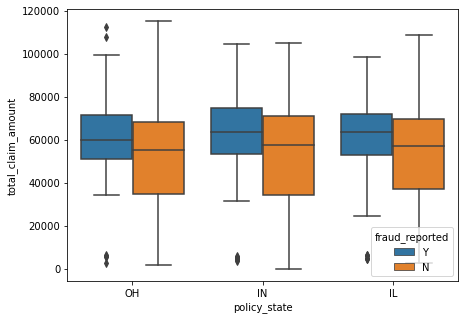

In [67]:
plt.figure(figsize=(7,5))
sns.boxplot(x="policy_state", y="total_claim_amount", hue="fraud_reported",data=data)
plt.show()

- IN this state has high median of total claim amount than others but it also has high fraud insurance claim.
- ON state has low median of total claim amount than others and it also have low fraud insurance claim than others.

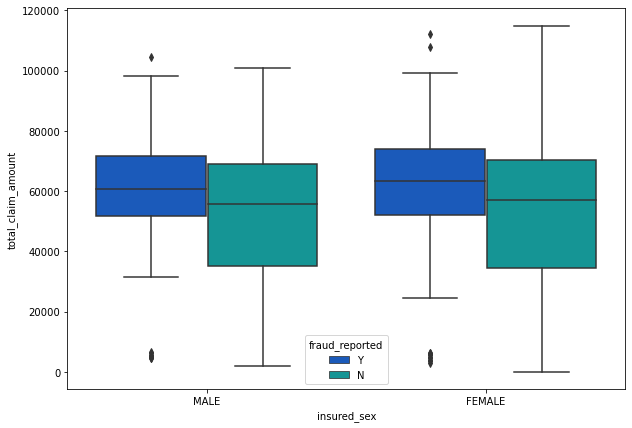

In [68]:
plt.figure(figsize=(10,7))
sns.boxplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data,palette='winter')
plt.show()

- Female has higher median total claim amount than male and it also have high fraud insurance claim than male.
- But male has low median total claim amount than female but it has same no fraud insurance claim.

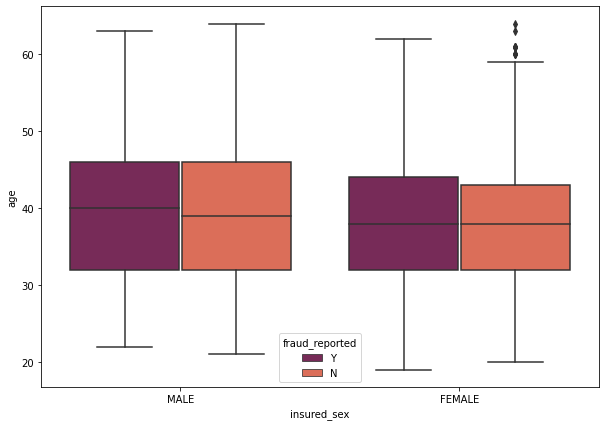

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot(x='insured_sex',y='age',hue='fraud_reported',data=data,palette='rocket')
plt.show()

- Median of age of male is 40 but median of age of female is 38. 
- But Male has high fraud insurance claim than female.

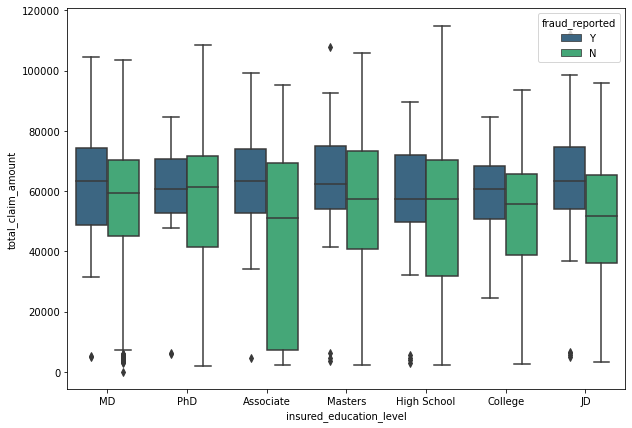

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(x='insured_education_level',y='total_claim_amount',hue='fraud_reported',data=data, palette='viridis')
plt.show()

- Whose have master degree they having high median of total claim amount than others and it also have high fraud insurance claim than others.
- High school education level insurance holder are having low total claim amount and they also have low fraud insurance claim.

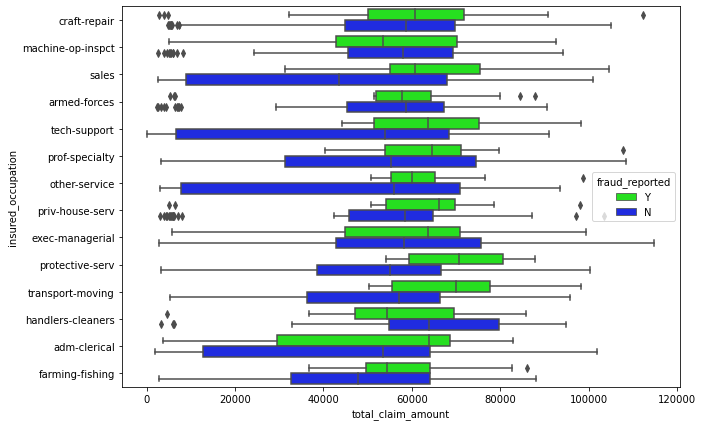

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(y='insured_occupation',x='total_claim_amount',hue='fraud_reported',data=data, palette='hsv')
plt.show()

- Whose doing Protective service as occupation they are having high total claim amount and they also having high fraud insurance claim than others.
- Similarly, Those doing Machine operator inspector as occupation they are having low median of total claim amount of insurance and they also have low fraud cases.

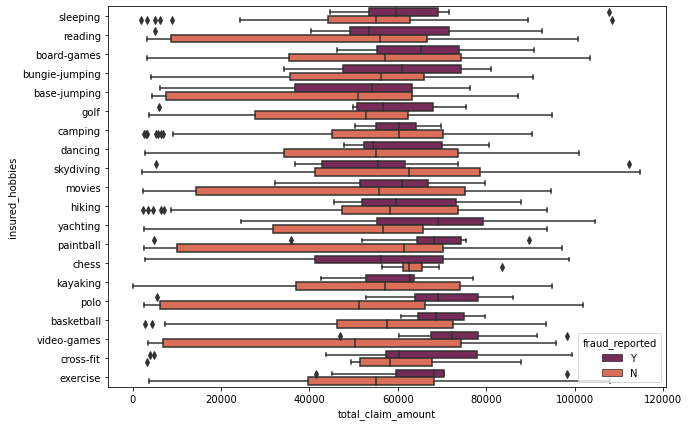

In [72]:
plt.figure(figsize=(10,7))
sns.boxplot(y='insured_hobbies',x='total_claim_amount',hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Whose have playing videos gane those are having high median total claim amount than others and it also have high fraud insurance claim.
- Whose have dacing as hobby they having low median of total claim amount than other follwed by reading. And It has low fraud insurance claim.

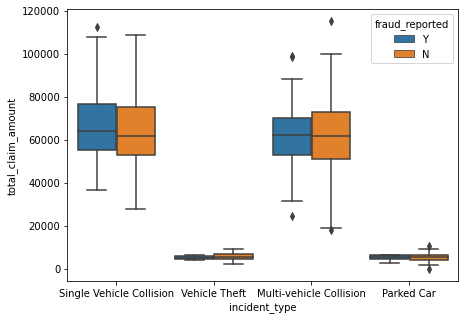

In [73]:
plt.figure(figsize=(7,5))
sns.boxplot(x='incident_type',y='total_claim_amount',hue='fraud_reported',data=data)
plt.show()

- Multi vehicle collision has high median of total claim amount i.e.65000 than other and it also have low fraud insurance claim.
- Vehivle theft has low median of total claim amount than other and it also have low fraud insurance claim.

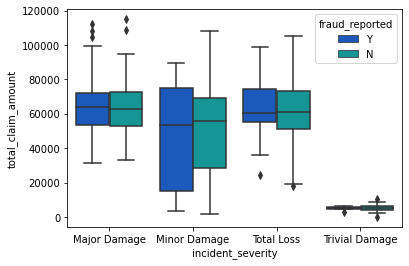

In [74]:
sns.boxplot(x='incident_severity',y='total_claim_amount',hue='fraud_reported',data=data, palette='winter')
plt.show()

- Major Damage has high median total claim amount i.e.65000 and it also have high fraud insurance claim than others.
- Trival Damage has low median of total claim amount and it also have low fraud insurance claim.

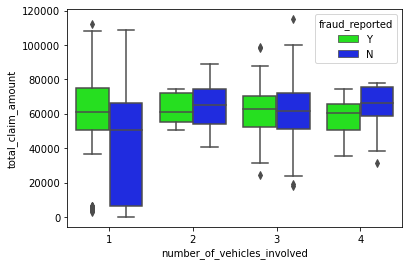

In [75]:
sns.boxplot(x='number_of_vehicles_involved',y='total_claim_amount',hue='fraud_reported',data=data,palette='hsv')
plt.show()

- No of vehicle 3 has high mediam of total claim amount than others and it also have high fraud insurance claim reported.
- No of vehicle 1 has low median of total claim amount than others and it has high fraud claim of insurance.

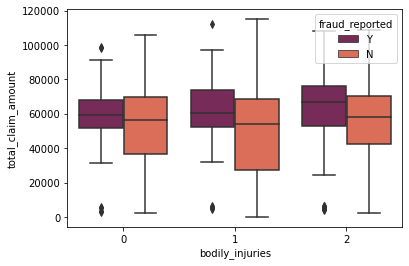

In [76]:
sns.boxplot(x='bodily_injuries',y='total_claim_amount',hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Bodily injuries 3 has high median of total claim amount than others and it also have high fraud insurance claim reported.
- Bodily injuries 1 has comparatively low median of total claim amount and it has low fraud insurance claim reported.

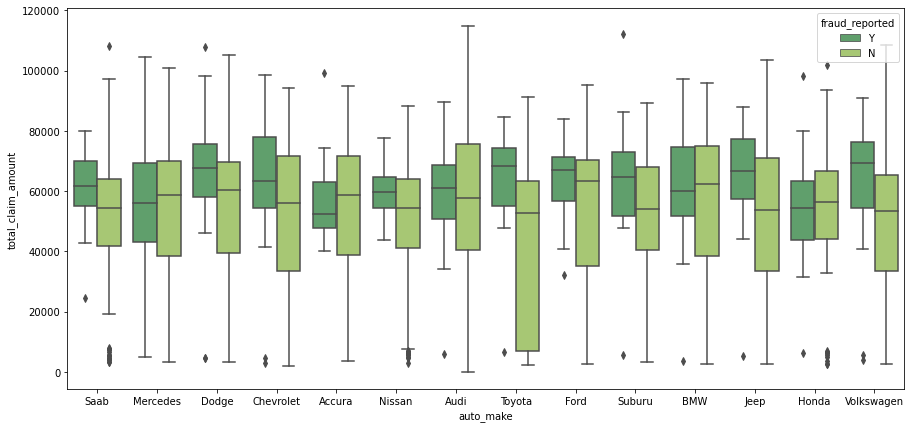

In [77]:
plt.figure(figsize=(15,7))
sns.boxplot(x='auto_make',y='total_claim_amount',hue='fraud_reported',data=data, palette='summer')
plt.show()

- Dodge auto maker has high median of total claim amount than others and it also have high fraud insurance claim than others.
- Accura auto maker has low median of total claim amount than other and it also have low fraud insurance claim than others.

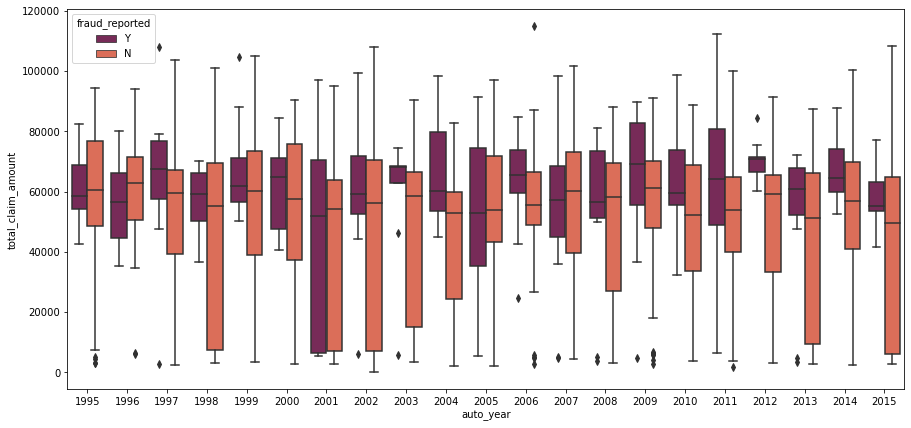

In [78]:
plt.figure(figsize=(15,7))
sns.boxplot(x='auto_year',y='total_claim_amount',hue='fraud_reported',data=data, palette='rocket')
plt.show()

- Motor made in 2009 year this year model has high median of total claim amount than others.
- But in 2015 made auto has low median of total claim amount than others.
- But 2001 auto year has maximum fraud insurance claim than other years.

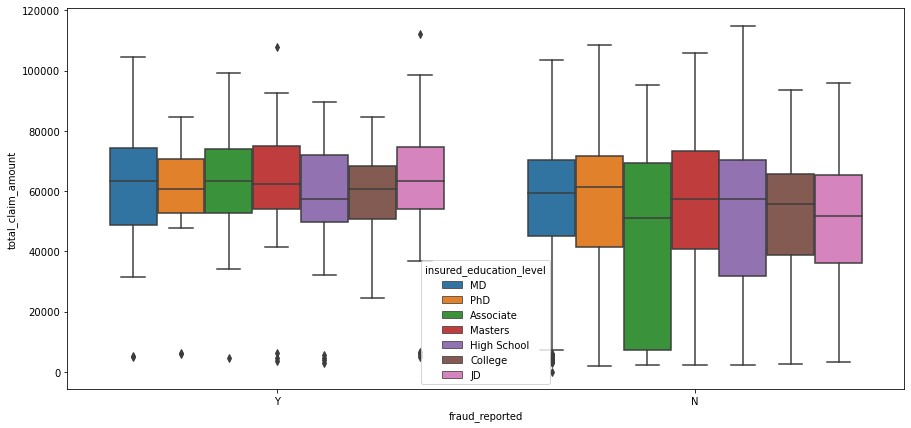

In [79]:
plt.figure(figsize=(15,7))
sns.boxplot(x='fraud_reported',y='total_claim_amount',hue='insured_education_level',data=data)
plt.show()

- Master degree holder has maximum median of total claim amount than others education and it also have high fraud insurance claim reported.
- High School education holder has low median of total claim amount and it also have low fraud insurance claim reported.

## 4. Encoding of DataFrame

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()

In [82]:
for col in data[data.columns[data.dtypes == 'object']]:
    data[col] = le.fit_transform(data[col])

In [83]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,2,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,1,1,4,5,5,628,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,0,0,4,2,0,669,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0


## 5. Describe the Dataset

In [84]:
data.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.022000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.964000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,0.728043,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.799589,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,2.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in total_claim_amount and capital_gains is high, columns is considerable indicating presence of outliers.
 - Some features hasve Mean to Standrad of deviation difference is close.

## 6. Correlation of the features with target column

In [85]:
data.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
policy_number                 -0.029443
auto_make                     -0.027519
police_report_available       -0.019571
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544


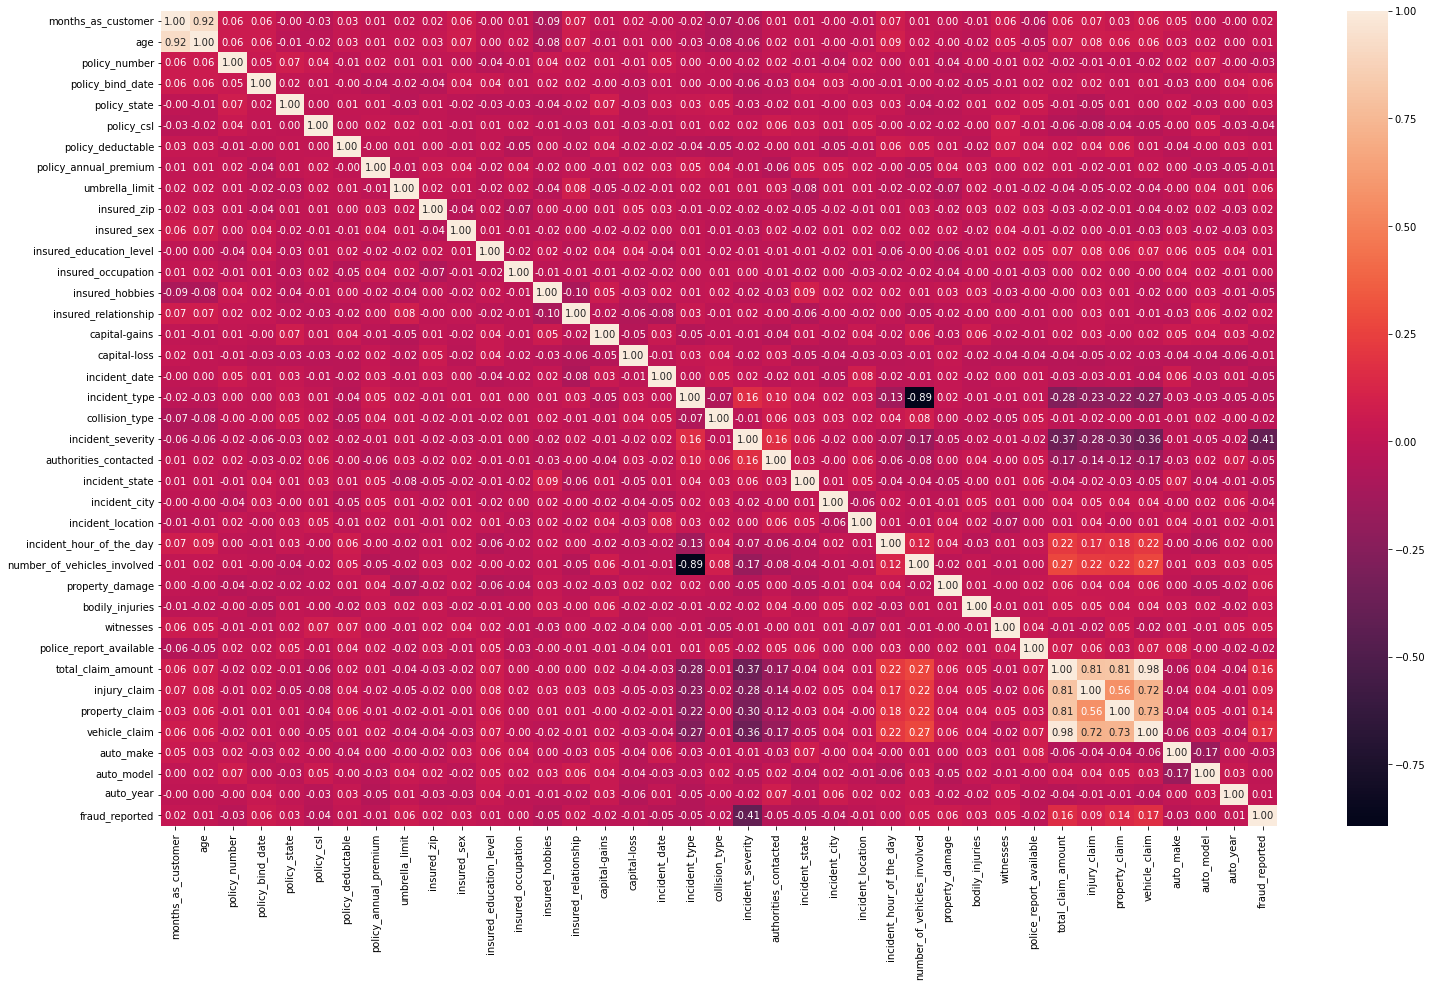

In [86]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. Insured_hobbies has 50% positive correlation with target column.
 2. Insured_security has 41% negative correlation with target column.
 3. Incident_type has 89% positve correlation with No of vehicle involved.
 4. Total Claim Ampunt has 98%, 91% and 91% positive correlation with vehicle claim, Property claim and injured claim.
 5. Property claim has 73% positive correlation with vehicle claim.
 

## 7. Visualizing correlation of feature columns with label column.

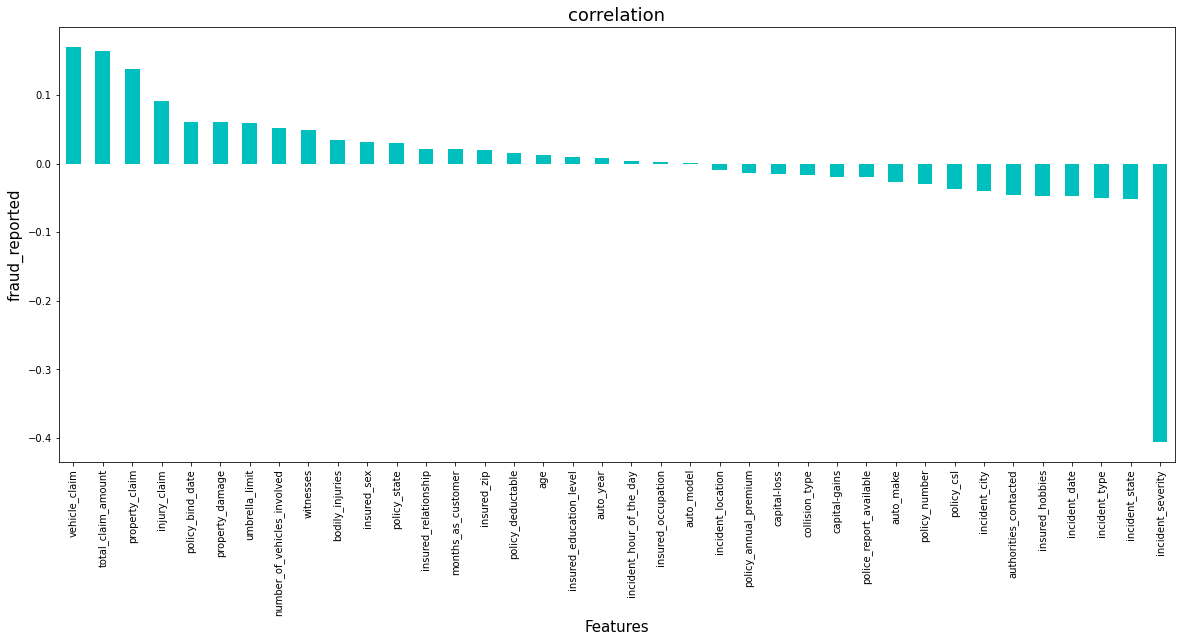

In [87]:
plt.figure(figsize = (20,8))
data.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- Vehicle_claim,total_claim_amount and Property_claim have the strongest positive correlation with fraud_reported.
- Whereas incident_security and incident_state have highest negatice correlation with fraud_reported.

## 8. Checking Distribution of data

In [88]:
data.shape

(1000, 39)

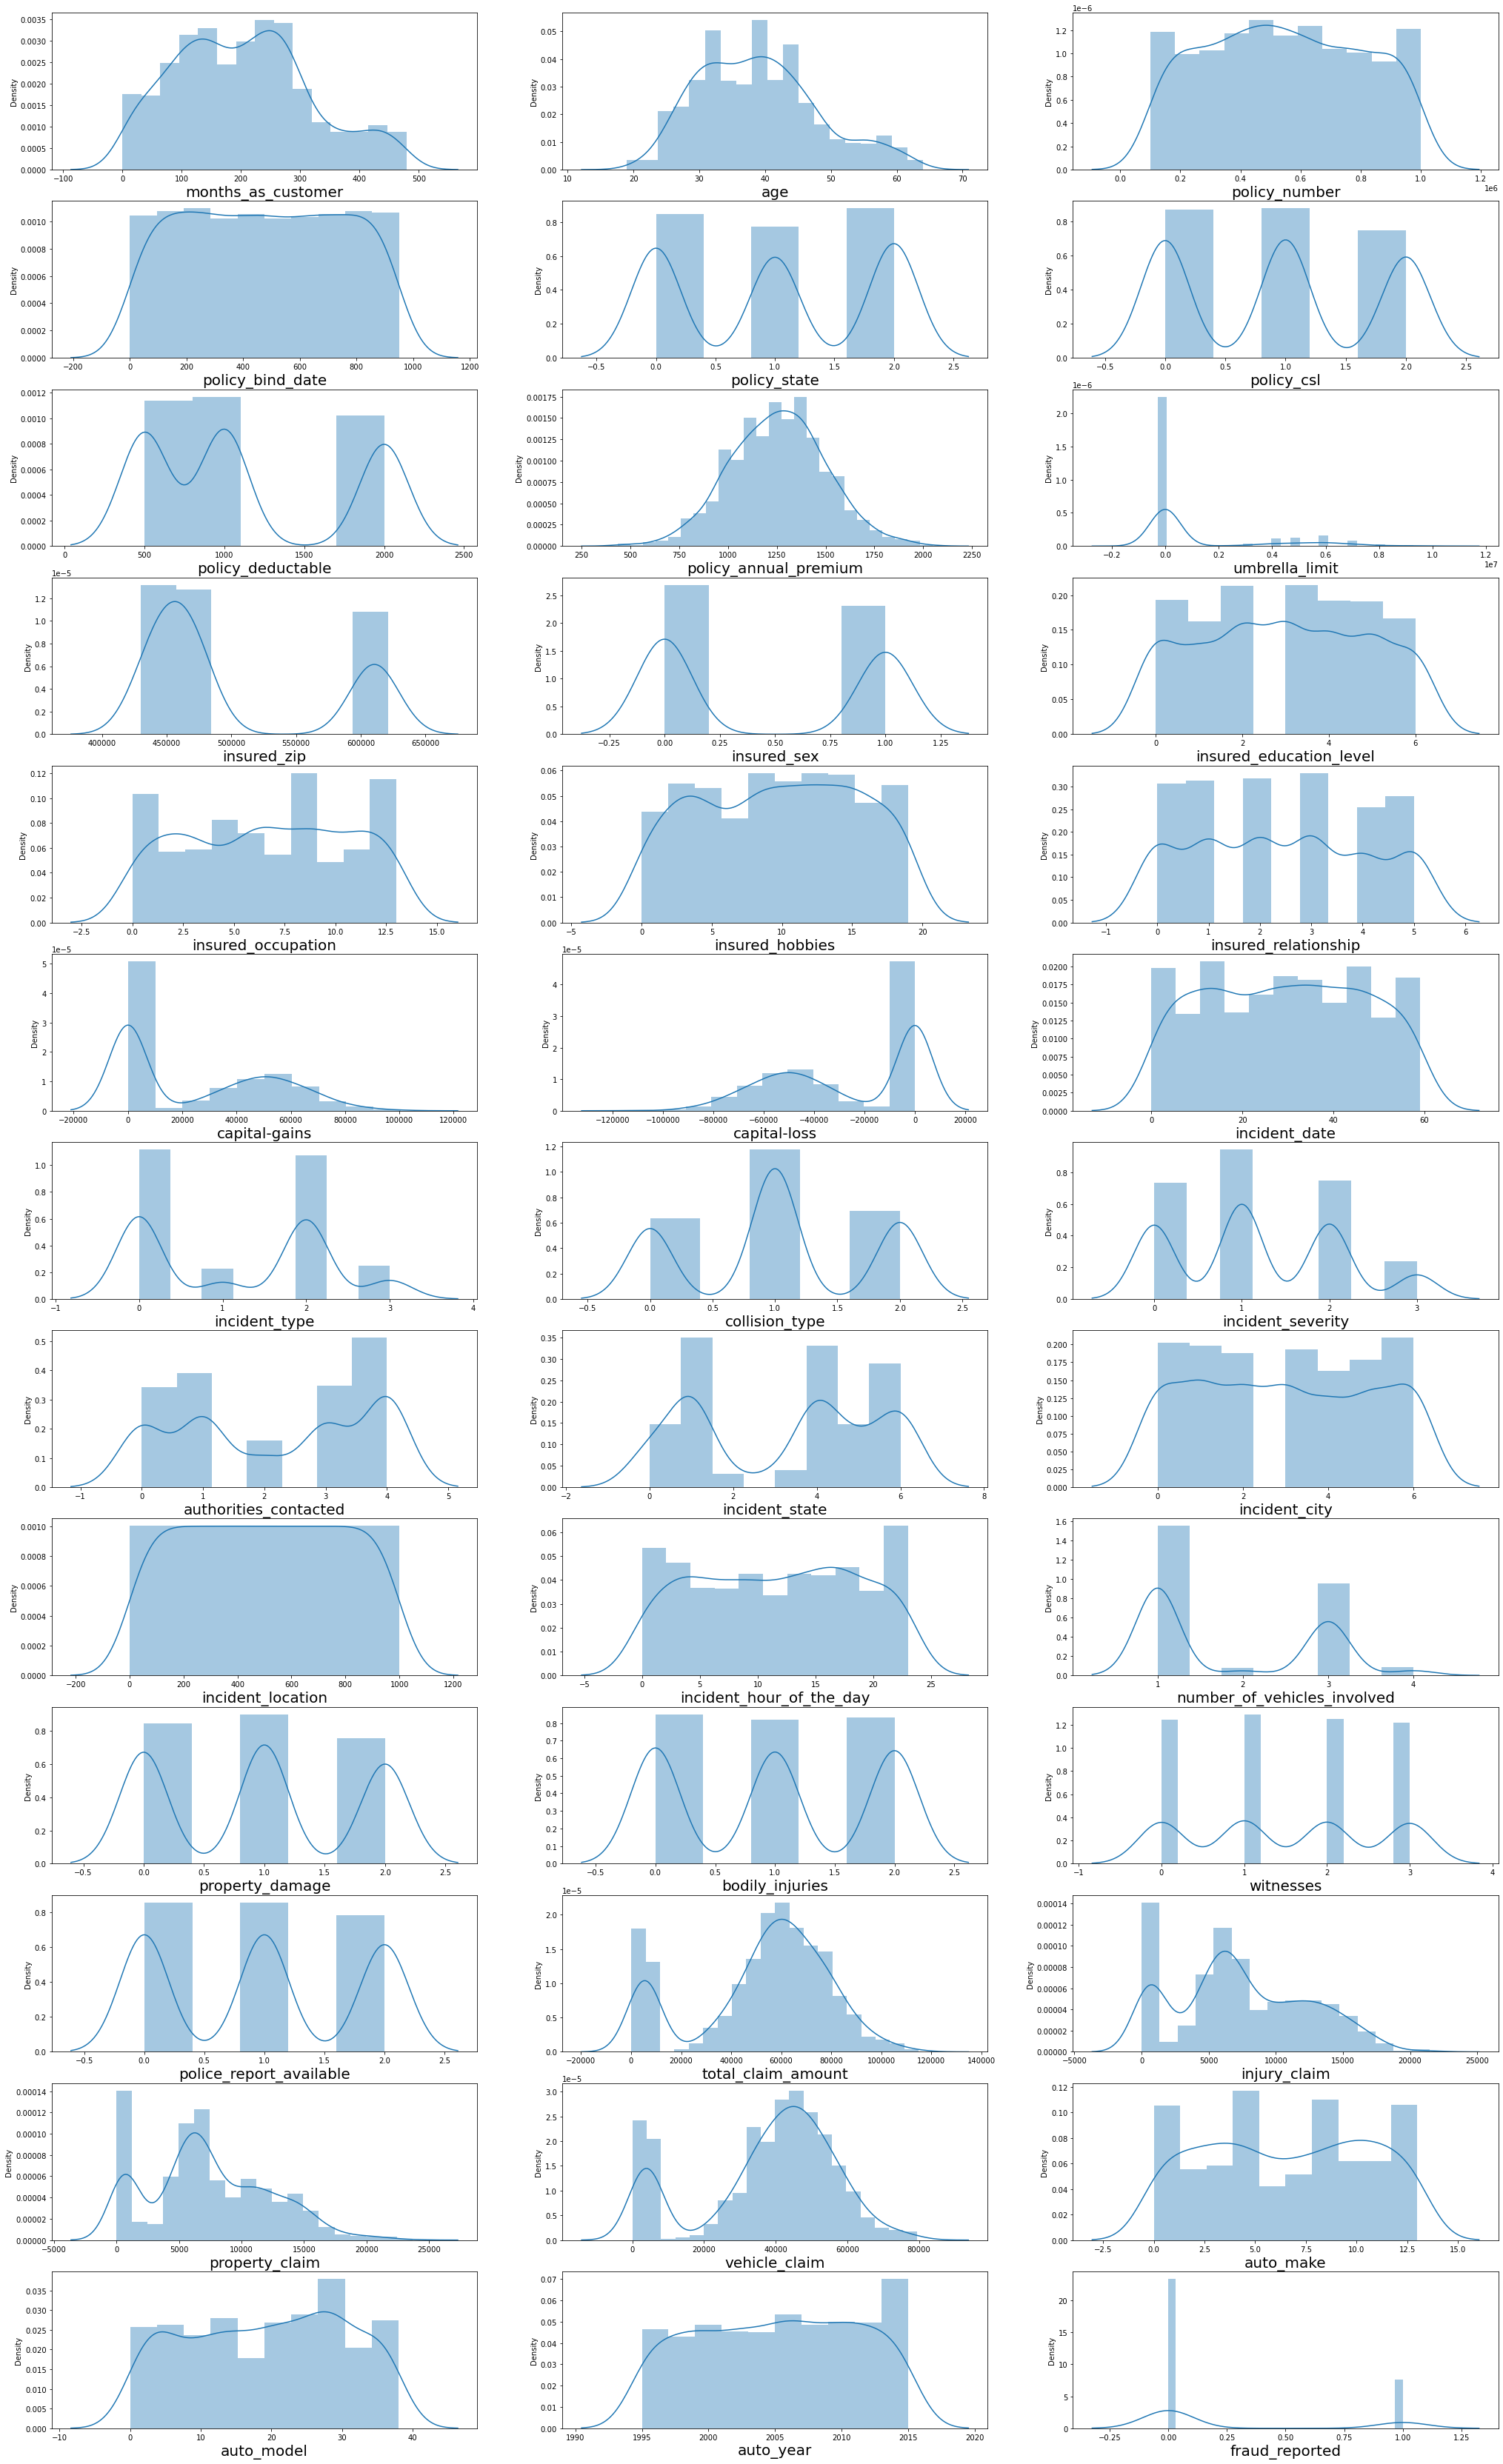

In [89]:
plt.figure(figsize=(35,60))
plotnumber = 1

for column in data:
    if plotnumber <=39:
        ax = plt.subplot(13,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- Policy annual premium is a normaly distributed.
- All feature  are having some skewness.

In [90]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- umbrella_limit, insured_zip, are having some skewness.
- But most of the features are not having skewness.

## 9. Checking Outliers

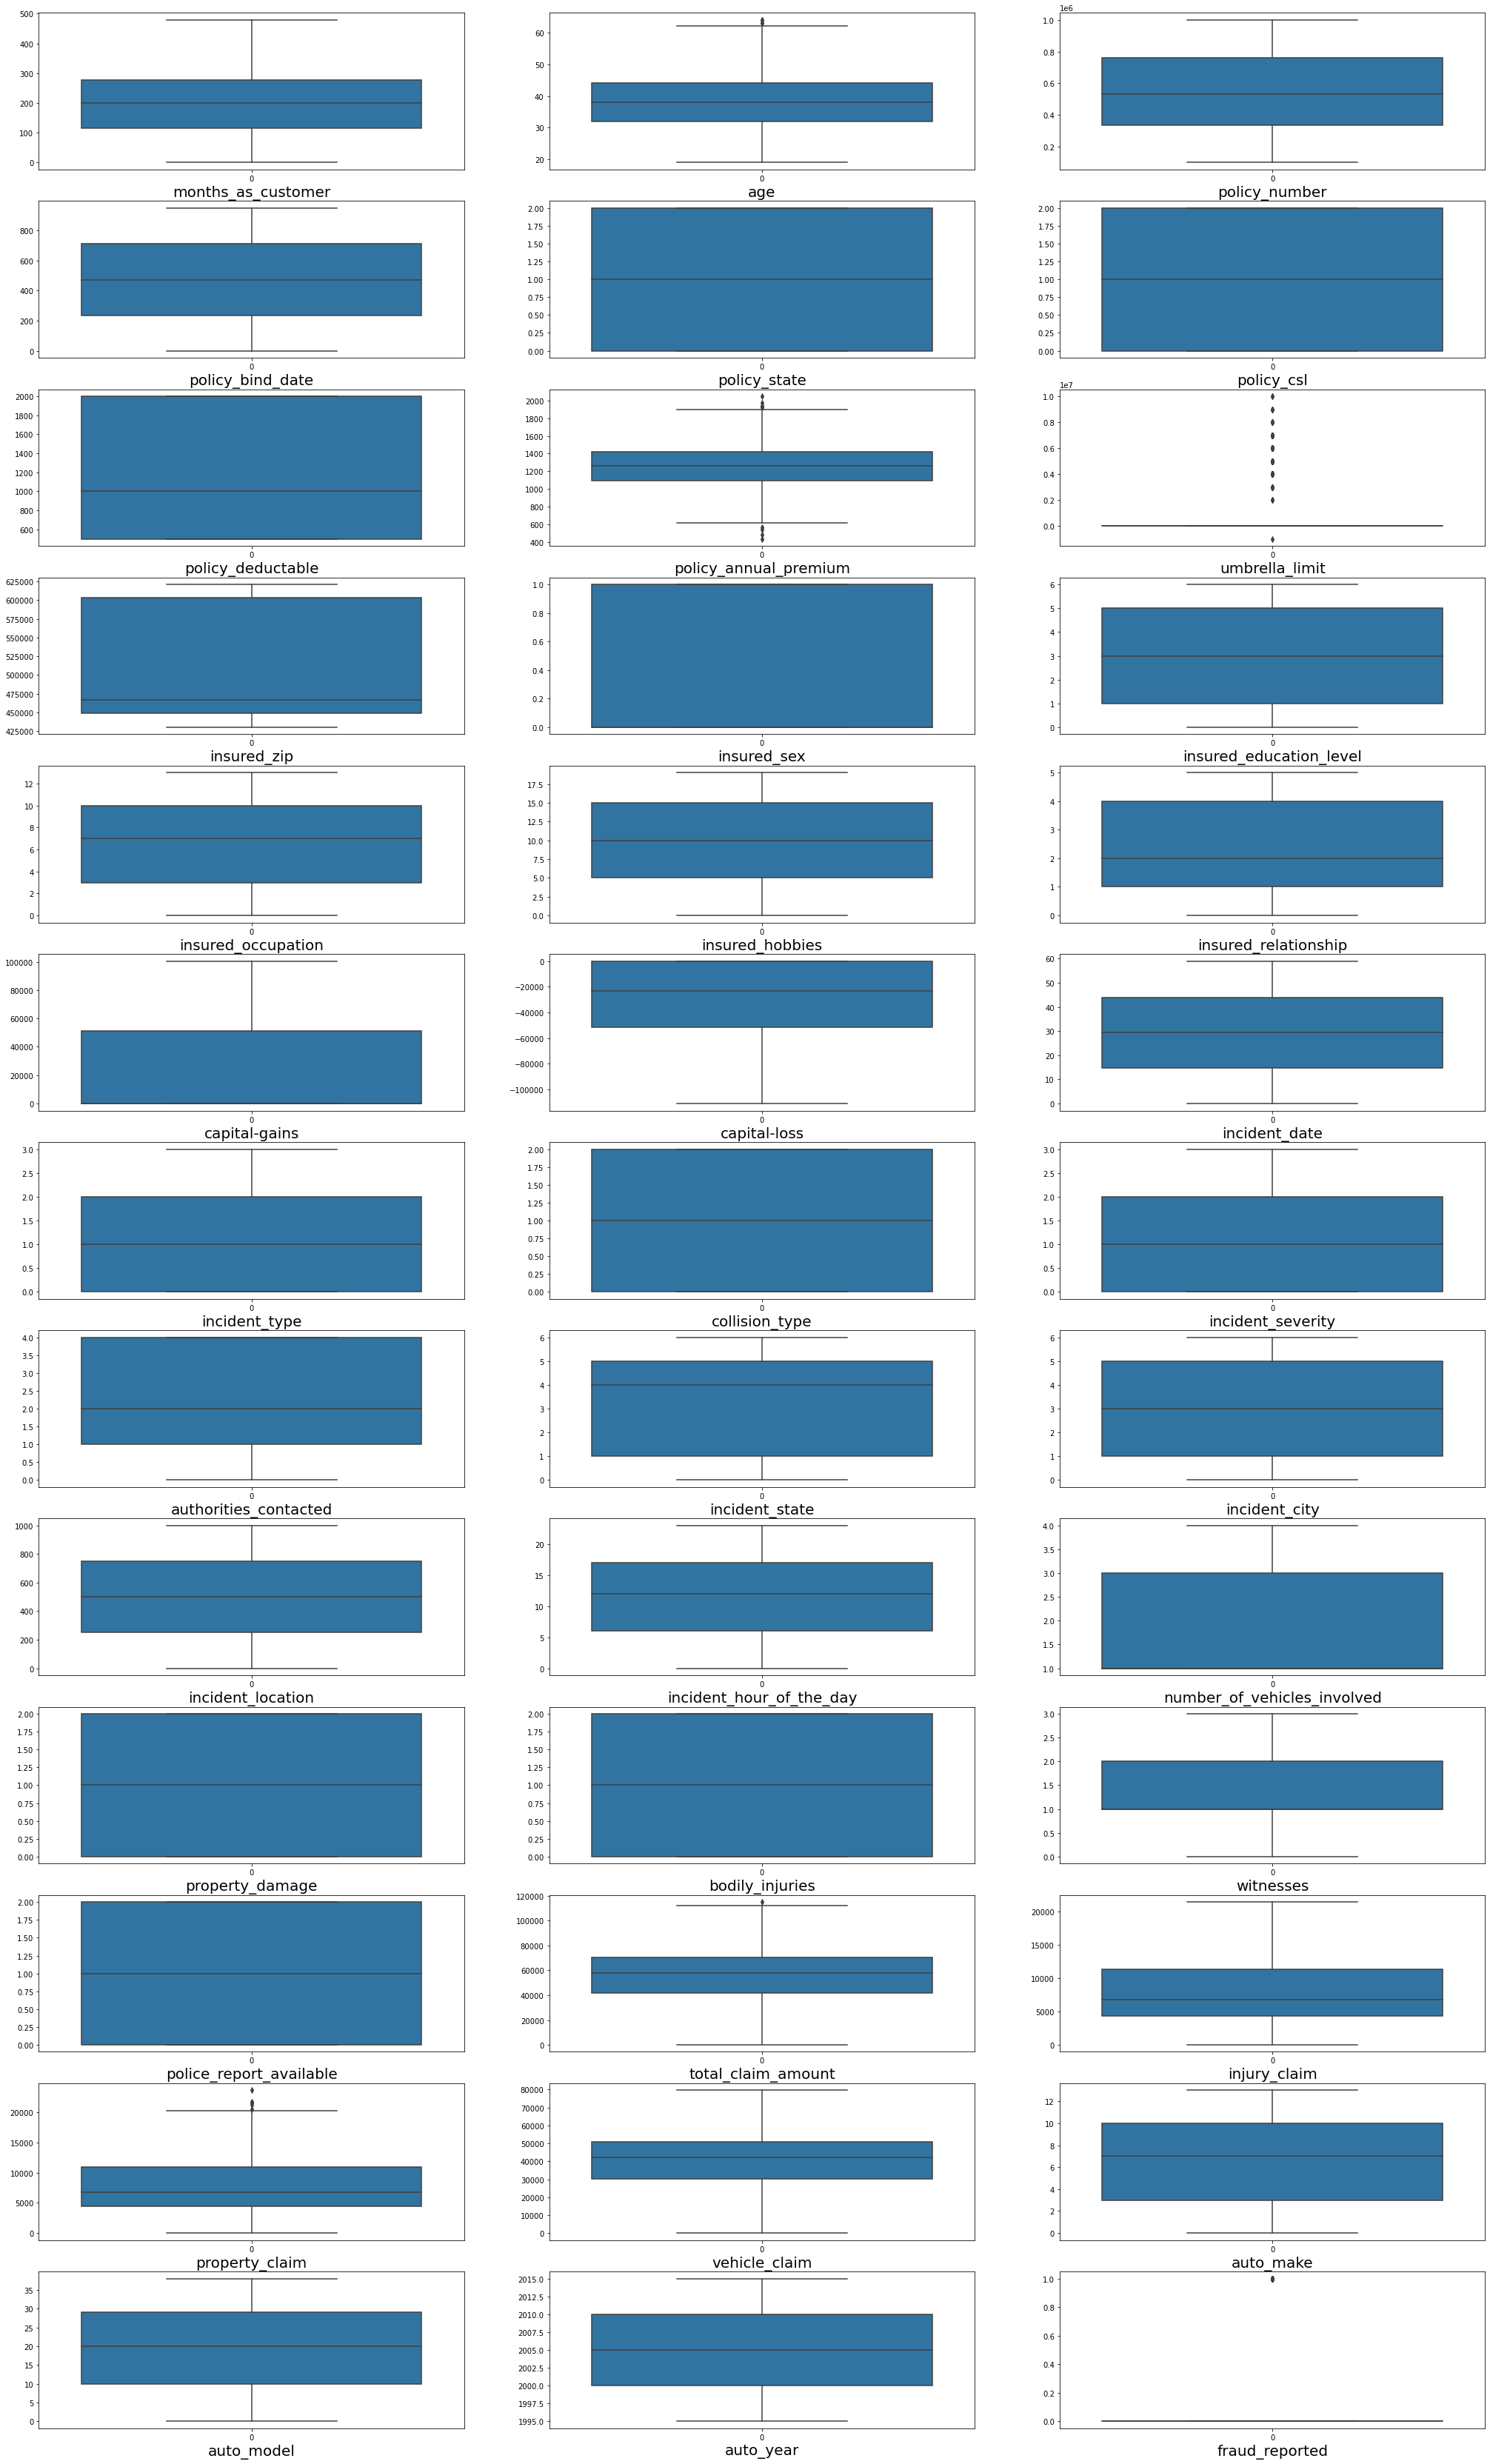

In [91]:
plt.figure(figsize=(35,60))
plotnumber = 1

for column in data:
    if plotnumber <=39:
        plt.subplot(13,3,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- Umbrella limit, policy_annual_premium are having some outliers.

### 9.1 Removing Outliers

In [92]:
from scipy.stats import zscore

z_score = zscore(data[['umbrella_limit','policy_annual_premium']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [93]:
df.shape

(982, 39)

In [94]:
data.shape

(1000, 39)

### 9.2 Percentage of data loss

In [95]:
data_loss = ((1000 - 982)/1000*100)
print(data_loss,'%')

1.7999999999999998 %


## 10. Checking Multicollinearity

In [96]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = pd.DataFrame()

In [101]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,months_as_customer,6.897244
1,age,6.909696
2,policy_number,1.032533
3,policy_bind_date,1.028544
4,policy_state,1.035935
5,policy_csl,1.033668
6,policy_deductable,1.040636
7,policy_annual_premium,1.035733
8,umbrella_limit,1.037931
9,insured_zip,1.035559


 - If VIF > 10, It means multicollinearity is present.
 - MultiCollinearity exists in total_claim_amount, injury_claim, property_claim and vehicle_claim Based on ANOVA F scores.

### 10.1 Droping columns whose having multicollinearity

In [102]:
df.drop(columns=['total_claim_amount','injury_claim','property_claim','vehicle_claim',],axis=1,inplace=True)

In [103]:
df.shape

(982, 35)

In [104]:
x = df.drop(columns=['fraud_reported'],axis=1)
y = df['fraud_reported']

## 11. Selecting Kbest Features

In [105]:
from sklearn.feature_selection import SelectKBest, f_classif

In [106]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [107]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                        Feature       Score
20            incident_severity  188.264321
27              property_damage    5.437290
3              policy_bind_date    3.541022
17                incident_date    3.452798
22               incident_state    2.614068
29                    witnesses    2.289877
13              insured_hobbies    2.282414
8                umbrella_limit    2.010416
21        authorities_contacted    1.851294
26  number_of_vehicles_involved    1.839849
18                incident_type    1.622217
23                incident_city    1.611638
28              bodily_injuries    1.394192
2                 policy_number    1.254188
4                  policy_state    1.126284
5                    policy_csl    1.085787
31                    auto_make    0.959871
14         insured_relationship    0.670714
0            months_as_customer    0.490189
10                  insured_sex    0.459058
30      police_report_available    0.316619
19               collision_type 

### 11.1 Selecting best features based on their scores

In [108]:
x_best = x.drop(columns=['insured_occupation','auto_model','auto_year']).copy()

### 11.2 Data Before removing Skewness

In [109]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


### 11.3 Data After Removing Skewness

In [110]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [111]:
trans = pd.DataFrame(x)

In [112]:
trans.skew()

0    -0.136533
1    -0.002044
2    -0.160756
3    -0.294855
4    -0.151592
5    -0.097714
6     0.022207
7    -0.007563
8    -7.946449
9     0.000000
10    0.143149
11   -0.187375
12   -0.248335
13   -0.160413
14    0.027247
15    0.088479
16   -0.265549
17   -0.095442
18   -0.129308
19   -0.079238
20   -0.223955
21   -0.255465
22   -0.182651
23   -0.289835
24   -0.258551
25    0.372110
26   -0.113093
27   -0.135356
28   -0.152764
29   -0.114325
30   -0.229270
dtype: float64

In [113]:
x = scaler.fit_transform(x)

In [114]:
x

array([[ 1.04530486,  1.00384449, -0.02056475, ...,  0.52002021,
         1.20455918,  0.8562826 ],
       [ 0.30056017,  0.42881513, -0.74145855, ..., -1.40739843,
         0.14359572,  0.41373887],
       [-0.51295324, -1.13538242,  0.58920748, ...,  1.28966505,
        -1.24666957, -0.5624812 ],
       ...,
       [-0.55132548, -0.46929029,  1.37261418, ...,  1.28966505,
         1.20455918,  1.06946453],
       [ 1.90442978,  2.12157375,  0.02647426, ..., -0.3513631 ,
         1.20455918, -1.446715  ],
       [ 1.89190813,  1.97725034,  0.11002258, ...,  1.28966505,
         0.14359572,  0.41373887]])

# 12. Building Model

## 12.1 Balancing Datasaet

In [115]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [116]:
smt_y.value_counts()

1    742
0    742
Name: fraud_reported, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## 12.2 LogisticRegression
### Finding Best Random state

In [128]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7802690582959642 on Random State 674


In [129]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=674)

In [130]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7802690582959642

### Cross - validation for logistic Regression

In [121]:
from sklearn.model_selection import cross_val_score

In [132]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [133]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 77.69868923179028
accuracy_score is:- 78.02690582959642


At cv:- 5
Cross validation score is:- 78.10577022687248
accuracy_score is:- 78.02690582959642


At cv:- 6
Cross validation score is:- 77.70337672701882
accuracy_score is:- 78.02690582959642


At cv:- 7
Cross validation score is:- 77.49601968446953
accuracy_score is:- 78.02690582959642


At cv:- 8
Cross validation score is:- 77.3973743835799
accuracy_score is:- 78.02690582959642


At cv:- 9
Cross validation score is:- 78.0038921323325
accuracy_score is:- 78.02690582959642




In [134]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.780038921323325 
The accuracy score is:  0.7802690582959642


In [125]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## 12.3 Random Forest Classifier
### Finding Best Random State

In [136]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9260089686098655 on Random State 222


In [137]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=222)

In [138]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 92.15%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       222
           1       0.94      0.91      0.92       224

    accuracy                           0.92       446
   macro avg       0.92      0.92      0.92       446
weighted avg       0.92      0.92      0.92       446


 Confusion Matrix: 
 [[208  14]
 [ 21 203]]


### Cross - Validation for Random Forest classifier

In [139]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [140]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 78.20847851335655
accuracy_score is:- 92.152466367713


At cv:- 5
Cross validation score is:- 78.1047342794986
accuracy_score is:- 92.152466367713


At cv:- 6
Cross validation score is:- 77.80250885330938
accuracy_score is:- 92.152466367713


At cv:- 7
Cross validation score is:- 79.33130699088144
accuracy_score is:- 92.152466367713


At cv:- 8
Cross validation score is:- 78.93009462881516
accuracy_score is:- 92.152466367713


At cv:- 9
Cross validation score is:- 79.01769993513112
accuracy_score is:- 92.152466367713




In [141]:
lsscore_selected = cross_val_score(rf,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7800550007236937 
The accuracy score is:  0.92152466367713


## 12.4 Gradient Boosting Classifier
### Finding Best Random State

In [142]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9260089686098655 on Random State 222


In [143]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=222)

In [144]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 96.72%

==========================Test Result=======================
Accuracy Score: 92.60%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       222
           1       0.92      0.93      0.93       224

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446


 Confusion Matrix: 
 [[204  18]
 [ 15 209]]


### Cross - validation For GradientBoosting Classifier

In [145]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [146]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 83.60710137713622
accuracy_score is:- 92.60089686098655


At cv:- 5
Cross validation score is:- 83.60820470320107
accuracy_score is:- 92.60089686098655


At cv:- 6
Cross validation score is:- 81.77589904733404
accuracy_score is:- 92.60089686098655


At cv:- 7
Cross validation score is:- 83.20234476769431
accuracy_score is:- 92.60089686098655


At cv:- 8
Cross validation score is:- 82.48950419832066
accuracy_score is:- 92.60089686098655


At cv:- 9
Cross validation score is:- 83.8087294968029
accuracy_score is:- 92.60089686098655




In [147]:
lsscore_selected = cross_val_score(gbc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.837077193957928 
The accuracy score is:  0.9260089686098655


## 12.5 SVC
### Finding Best Random State

In [148]:
from sklearn.svm import SVC

In [149]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.905829596412556 on Random State 187


In [150]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=187)

In [151]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 95.47%

==========================Test Result=======================
Accuracy Score: 90.58%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       207
           1       0.92      0.91      0.91       239

    accuracy                           0.91       446
   macro avg       0.91      0.91      0.91       446
weighted avg       0.91      0.91      0.91       446


 Confusion Matrix: 
 [[187  20]
 [ 22 217]]


### Cross - Validation for SVC

In [152]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [153]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 75.86568773851003
accuracy_score is:- 90.5829596412556


At cv:- 5
Cross validation score is:- 75.66248834559205
accuracy_score is:- 90.5829596412556


At cv:- 6
Cross validation score is:- 75.66212778692204
accuracy_score is:- 90.5829596412556


At cv:- 7
Cross validation score is:- 75.8669850919091
accuracy_score is:- 90.5829596412556


At cv:- 8
Cross validation score is:- 75.76386112221778
accuracy_score is:- 90.5829596412556


At cv:- 9
Cross validation score is:- 75.45732554906867
accuracy_score is:- 90.5829596412556




In [154]:
lsscore_selected = cross_val_score(svc,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.758669850919091 
The accuracy score is:  0.905829596412556


## 12.6 KNN
### Finding Random State

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7130044843049327 on Random State 296


In [157]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=296)

In [158]:

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 73.89%

==========================Test Result=======================
Accuracy Score: 71.30%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.39      0.55       199
           1       0.66      0.98      0.79       247

    accuracy                           0.71       446
   macro avg       0.80      0.68      0.67       446
weighted avg       0.78      0.71      0.68       446


 Confusion Matrix: 
 [[ 77 122]
 [  6 241]]


### Cross - Validation for KNN

In [159]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [160]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 72.91065206570433
accuracy_score is:- 71.30044843049326


At cv:- 5
Cross validation score is:- 73.41862633378223
accuracy_score is:- 71.30044843049326


At cv:- 6
Cross validation score is:- 72.30223452541273
accuracy_score is:- 71.30044843049326


At cv:- 7
Cross validation score is:- 73.22116080474743
accuracy_score is:- 71.30044843049326


At cv:- 8
Cross validation score is:- 72.91333466613355
accuracy_score is:- 71.30044843049326


At cv:- 9
Cross validation score is:- 73.42229635807618
accuracy_score is:- 71.30044843049326




In [161]:
lsscore_selected = cross_val_score(knn,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7322116080474743 
The accuracy score is:  0.7130044843049327


## 12.7 XGBOOST
### Finding Best Random State

In [162]:
from xgboost import XGBClassifier

In [163]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

[19:14:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:14:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [164]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=222)

In [165]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


[19:17:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 94.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       222
           1       0.94      0.94      0.94       224

    accuracy                           0.94       446
   macro avg       0.94      0.94      0.94       446
weighted avg       0.94      0.94      0.94       446


 Confusion Matrix: 
 [[209  13]
 [ 13 211]]


### Cross - Validation for XGBOOST

In [166]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [167]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

[19:17:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [168]:
lsscore_selected = cross_val_score(xgb,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

[19:18:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:18:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## 13. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined Logistic Regression is the best model. It has least difference between accuracy score and cross validation.

## 14. Hyperparameter Tuning

In [172]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [132]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=501)

In [180]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'tol': [0.19031,0.09030],
    }]

In [181]:
gridsearch = GridSearchCV(lr, param_grid=param_grid)

In [182]:
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'C': 0.012742749857031334,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.0903}

In [134]:
lr = LogisticRegression(C=10, max_iter = 5000, penalty='l1',solver ='saga',tol=0.0903)
lr.fit(x_train,y_train)

metric_score(lr,x_train,x_test,y_train, y_test, train=True)

metric_score(lr,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 76.69%

==========================Test Result=======================
Accuracy Score: 81.17%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       228
           1       0.82      0.79      0.80       218

    accuracy                           0.81       446
   macro avg       0.81      0.81      0.81       446
weighted avg       0.81      0.81      0.81       446


 Confusion Matrix: 
 [[190  38]
 [ 46 172]]


## 15. ROC_AUC Curve

In [719]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

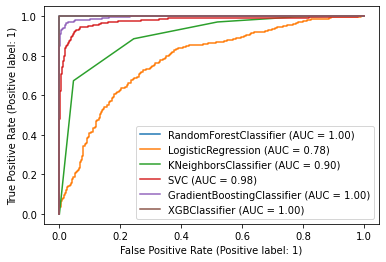

In [170]:
# AUC Curve For Training
disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plot_roc_curve(xgb, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 1440x1080 with 0 Axes>

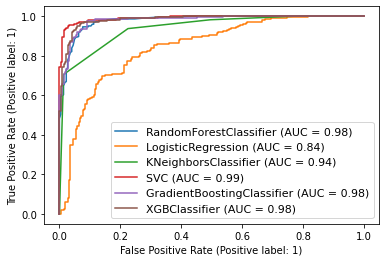

In [171]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## 16. Documenting the finding

- Null values present in dataset.
- There are less customers are doing fraud. Data is inbalance so we need to balance it while building the model.
- Most of the insurance holder are in the range of 30 to 45 years age. In this age mostly insurance holder lies. After the 45 year insurance holder age is decreasing.
- We can see, junior degree is higher count than other whose holding insurance followed by high school. Education it does not matter for insurance any one cna insuraed. And above it show the college and Phd holder are in less number who are having insurance.
- maximum machine oerator inspector are having maximum insurance holding customer than other followed by prof-speciality. Those are doing farming- fishing they are in less number and even they are less insurance holder than others followed by cleaners. We can see, occupation it that much is not matter for insurance like education.
- We can see, Own-child has in maximum whose having relation with insurance holder followed by other relative. Unmarried is less in number whose having relation with insurance holder followed by wife.
- We can see, on date 2/2/2015 has maximum claiming. On this date most of the customer are claiming their amount foolowed by 17/2/2015. And 5/1/2015 on this date there are less customers are claiming for thier amount than others.
- We can see, multi-vehicle collision has maximum count than other whose incident happend. It is need to overcome this because fatality rate may also high due to multi-vehicle collision. Parked Car is lowest among other incident type.
- From above we can see, Minor damage is maximum than others. Is ok because Of less incident severity the damqage is minor than others. But Major Damage and Total loss also in same count and it has more loss. Trivial Damage is lower than others damage and it is in low incident severity
- Police has maximum reported the cases than others. It is main source of authorites to contact followed by Fire. Other has lower count in athorities contacted where no one call to other. If the incident is happend mostly call for Ambulance and followed by Police but in the case it is in reversed.
- Springfield in this city maximum cases are reported followed by Arlington city. In Northbrook has reported lower incident than other city. But most of the cities are reported upto 130 incident.
- We can see, at 17 hour in incident hour of the day has maximum cases are reported folloed by 3. But can observed here is 17 hours it simply 17oclock at this a office leaving time. So we can say that most of the incident are happend durring office leaving hours. In 20 hour less incident are reported.
- Executive manager has reported maximum fraud insurance claim than others followed by transport. It means those are doing managerial occupation has maximum fraud insurance claim followed by transport. Those are doing clerical occupation has lowest fraud detection than others followed by cleaners.
- Multi-vehicle collision has maximum fraud claim reported than others followed by single vehicle collision. Vehicle theft has lowest fraid claim reported.
- Female has higher median total claim amount than male and it also have high fraud insurance claim than male. But male has low median total claim amount than female but it has same no fraud insurance claim.
- Whose have master degree they having high median of total claim amount than others and it also have high fraud insurance claim than others. High school education level insurance holder are having low total claim amount and they also have low fraud insurance claim.
- Whose doing Protective service as occupation they are having high total claim amount and they also having high fraud insurance claim than others.Similarly, Those doing Machine operator inspector as occupation they are having low median of total claim amount of insurance and they also have low fraud cases.
- Whose have playing videos gane those are having high median total claim amount than others and it also have high fraud insurance claim. Whose have dacing as hobby they having low median of total claim amount than other follwed by reading. And It has low fraud insurance claim.
- Dodge auto maker has high median of total claim amount than others and it also have high fraud insurance claim than others. Accura auto maker has low median of total claim amount than other and it also have low fraud insurance claim than others.
- Motor made in 2009 year this year model has high median of total claim amount than others. But in 2015 made auto has low median of total claim amount than others. But 2001 auto year has maximum fraud insurance claim than other years.
- Master degree holder has maximum median of total claim amount than others education and it also have high fraud insurance claim reported. High School education holder has low median of total claim amount and it also have low fraud insurance claim reported.


## 17. Model Save

In [738]:
import joblib
joblib.dump(lr,"insurance_claim_fraud_prediction.pkl")

['insurance_claim_fraud_prediction.pkl']

### 17.1 Loading The Model

In [739]:
mod=joblib.load("insurance_claim_fraud_prediction.pkl")

### 17.2 Predicting the class

In [740]:
print(mod.predict(x))

[1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 

In [741]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,1,1
1,0,1
2,1,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0
